In [1]:
from bggcomplex import *

BGG = BGGComplex("A3")

reflect = BGG.WeylDic["1"]
BGG.dot_action(reflect,BGG.zero_root)

[-1, 0, 0]

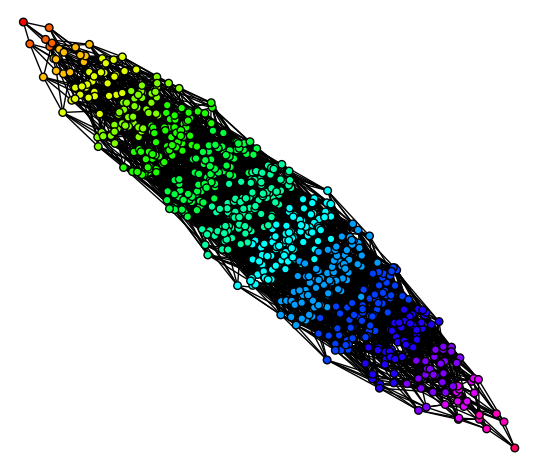

In [2]:
BGG.plot_graph().plot()

In [4]:
BGG.find_cycles()

AttributeError: BGGComplex instance has no attribute 'find_cycles'

In [8]:
from itertools import groupby, chain

vertices=BGG.WeylDic.keys()
arrows=BGG.arrows

outgoing={k:map(lambda x:x[1],v) for k,v in groupby(arrows,lambda x: x[0])}
outgoing[max(vertices,key=lambda x: len(x))]=[]
incoming={k:map(lambda x:x[0],v) for k,v in groupby(arrows,lambda x: x[1])}
incoming['']=[]

cycles=chain.from_iterable([[a+(v,) for v in outgoing[a[-1]]] for a in arrows])
cycles=chain.from_iterable([[a+(v,) for v in incoming[a[-1]] if v != a[1]] for a in cycles])
cycles=[a+(a[0],) for a in cycles if a[0] in incoming[a[-1]]]

In [7]:
cycles

[('', '1', '21', '2', ''),
 ('', '1', '31', '3', ''),
 ('', '1', '12', '2', ''),
 ('', '3', '23', '2', ''),
 ('', '3', '32', '2', ''),
 ('323', '3123', '12312', '2312', '323'),
 ('323', '3231', '23212', '2312', '323'),
 ('3', '23', '123', '31', '3'),
 ('3', '23', '231', '31', '3'),
 ('3', '32', '312', '31', '3'),
 ('3', '32', '321', '31', '3'),
 ('2', '23', '323', '32', '2'),
 ('2', '21', '212', '12', '2'),
 ('123', '3123', '32123', '2123', '123'),
 ('2123', '12312', '312312', '32123', '2123'),
 ('32', '312', '2312', '323', '32'),
 ('31', '231', '2123', '123', '31'),
 ('31', '231', '3231', '321', '31'),
 ('31', '312', '3212', '321', '31'),
 ('31', '312', '3123', '123', '31'),
 ('2312', '12312', '312312', '23212', '2312'),
 ('2312', '23212', '312312', '12312', '2312')]